In [1]:
import pandas as pd
import osmnx as ox
import geopandas as gpd
import numpy as np
import os
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

'/home/cseadmin/dz/TrafficFlowModel/data_process/whc'

<AxesSubplot:>

,geometry,fid
0,"LINESTRING (114.09928 22.55853, 114.09115 22.5...",0
1,"LINESTRING (114.09948 22.54352, 114.09965 22.5...",1
2,"LINESTRING (114.08166 22.54314, 114.08166 22.5...",2
3,"LINESTRING (114.08166 22.54078, 114.07778 22.5...",3
4,"LINESTRING (114.08160 22.55859, 114.07609 22.5...",4
5,"LINESTRING (114.08160 22.55859, 114.06794 22.5...",5
6,"LINESTRING (114.06794 22.55816, 114.06257 22.5...",6
7,"LINESTRING (114.07609 22.55156, 114.07182 22.5...",7
8,"LINESTRING (114.06781 22.55103, 114.06257 22.5...",8
9,"LINESTRING (114.05787 22.55137, 114.05787 22.5...",9


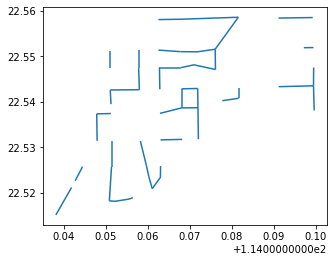

In [2]:
gdf = gpd.read_file("../../data/whc/gis/GeoLine.shp")
gdf.drop(columns="id", inplace=True)
gdf["fid"]=range(len(gdf))

gdf.plot()
gdf

In [3]:
# https://gis.stackexchange.com/questions/415864/how-do-you-flip-invert-reverse-the-order-of-the-coordinates-of-shapely-geometrie
import shapely

def invert_coords(input_geom):
    if input_geom.type.lower() == "linestring":
        coords = [tuple(coord) for coord in list(input_geom.coords)][::-1]
        out_geom = shapely.geometry.LineString(coords)
    elif input_geom.type.lower() == "multilinestring":
        coords = [list(this_geom.coords)[::-1] for this_geom in input_geom.geoms][::-1]
        out_geom = shapely.geometry.MultiLineString(coords)
    return out_geom

In [4]:
gdf_reverse=gpd.GeoDataFrame(columns=["fid", "geometry"])

for index, row in gdf.iterrows():
    gdf_reverse.loc[len(gdf_reverse)]=[row["fid"]+len(gdf), invert_coords(row["geometry"])]
    
gdf_reverse

,fid,geometry
0,39,"LINESTRING (114.09115 22.55841, 114.09928 22.5..."
1,40,"LINESTRING (114.09965 22.53811, 114.09948 22.5..."
2,41,"LINESTRING (114.08166 22.54078, 114.08166 22.5..."
3,42,"LINESTRING (114.07778 22.54025, 114.08166 22.5..."
4,43,"LINESTRING (114.07609 22.55156, 114.08160 22.5..."
5,44,"LINESTRING (114.06794 22.55816, 114.08160 22.5..."
6,45,"LINESTRING (114.06257 22.55808, 114.06794 22.5..."
7,46,"LINESTRING (114.06781 22.55103, 114.07182 22.5..."
8,47,"LINESTRING (114.06257 22.55137, 114.06781 22.5..."
9,48,"LINESTRING (114.05787 22.54741, 114.05787 22.5..."


In [5]:
gdf=gdf.append(gdf_reverse).reset_index(drop=True)

gdf

,geometry,fid
0,"LINESTRING (114.09928 22.55853, 114.09115 22.5...",0
1,"LINESTRING (114.09948 22.54352, 114.09965 22.5...",1
2,"LINESTRING (114.08166 22.54314, 114.08166 22.5...",2
3,"LINESTRING (114.08166 22.54078, 114.07778 22.5...",3
4,"LINESTRING (114.08160 22.55859, 114.07609 22.5...",4
...,...,...
73,"LINESTRING (114.03816 22.51514, 114.04190 22.5...",73
74,"LINESTRING (114.04277 22.52264, 114.04451 22.5...",74
75,"LINESTRING (114.05128 22.53949, 114.05111 22.5...",75
76,"LINESTRING (114.09719 22.55189, 114.09948 22.5...",76


In [6]:
nodes = set()
for index, item in gdf.iterrows():
    nodes.add(item["geometry"].coords[0])
    nodes.add(item["geometry"].coords[-1])
    
d = {}
nodes = list(nodes)
for i in range(len(nodes)):
    d[nodes[i]] = i
    
gdf["u"] = gdf.apply(lambda z: d[z["geometry"].coords[0]], axis=1)
gdf["v"] = gdf.apply(lambda z: d[z["geometry"].coords[-1]], axis=1)

gdf

,geometry,fid,u,v
0,"LINESTRING (114.09928 22.55853, 114.09115 22.5...",0,43,39
1,"LINESTRING (114.09948 22.54352, 114.09965 22.5...",1,19,26
2,"LINESTRING (114.08166 22.54314, 114.08166 22.5...",2,50,40
3,"LINESTRING (114.08166 22.54078, 114.07778 22.5...",3,40,5
4,"LINESTRING (114.08160 22.55859, 114.07609 22.5...",4,27,15
...,...,...,...,...
73,"LINESTRING (114.03816 22.51514, 114.04190 22.5...",73,33,14
74,"LINESTRING (114.04277 22.52264, 114.04451 22.5...",74,2,55
75,"LINESTRING (114.05128 22.53949, 114.05111 22.5...",75,34,25
76,"LINESTRING (114.09719 22.55189, 114.09948 22.5...",76,29,35


In [10]:
gdf.to_file("../../data/whc/fmm_whc/edges.shp", driver="ESRI Shapefile", encoding="utf8")